# CE9010 Introduction To Data Analysis

## Group 3

Student Name  |  Matric No  
:-:|:-:
Say Yueyang, Symus|U1922016K   
He Zeqing|U1722721G
Kwek Yan Qing|U1740743J   

---

# Background

Haze is one major form of air pollution that Singaporeans face annually. The presence of haze is attributed to the forest fires in Sumatra, Indonesia. Due to the increase in demand of commercial crops, Indonesian farmers have resorted to shifting agriculture, which includes the large-scale slash-and-burn of forest land to produce fertile planting grounds. The resulting air pollution is then spread across the region by the climatic phenomenon El Nino, enveloping Singapore in a blanket of haze and affecting the overall health of Singaporeans. In 2020, Indonesia fires torched approximately 207,000 hectares of forests from January to September. While the area is smaller compared to previous years, the burning resulted in a US$5.2 billion cost towards the Indonesian economy, and the occurrence of toxic smog over the city.

**References:**
- [Haze Pollution](https://eresources.nlb.gov.sg/infopedia/articles/SIP_2013-08-30_185150.html#:~:text=Forest%20fires%20in%20Sumatra%2C%20Indonesia,of%20the%20haze%20in%20Singapore.&text=Strong%20winds%20during%20the%20southwest,such%20fires%20throughout%20Southeast%20Asia.)
- [Commentary: Little smoke this haze season – but fires rage on in Indonesia](https://www.channelnewsasia.com/news/commentary/indonesia-forest-fire-peat-haze-palm-oil-jokowi-omnibus-bill-13533700)

# Objective

The objective of our study is to predict the possible intensity of future hotspots in South East Asia, including Indonesia.
Hopefully, this study will be able to support further research in estimating the possibility and severity of the occurrences of haze in Singapore.

Our study will be conducted with the relevant data on forest fires in South East Asia. Our dataset is obtained from the National Aeronautics and Space Administration (NASA)'s Fire Information for Resource Management System (FIRMS). It contains both geographical and technical data extracted from the Visible Infrared Imaging Radiometer Suite (VIIRS) sensor aboard their NOAA-20 weather satellite. As the collection of data by NASA FIRMS is still currently ongoing, our dataset is updated daily to ensure the most accurate representation of data possible.

The table below describes each data available in our dataset:

| Data | Description |
| -: | :- |
| latitude | Indicates the latitude of fire pixel. |
| longitude	| Indicates the longitude of fire pixel. |
| bright_ti4 | Indicates the VIIRS I-4 Channel brightness temperature of the fire pixel. |
| scan | Indicates the  Along Scan pixel size. |
| track	| Indicates the Along Track pixel size.  |
| acq_date | Indicates the date of the acquired data. |
| acq_time | Indicates the time of the acquired data. |
| satellite | Indicates if the scan was done by the satellite (boolean values). |
| confidence | Indicates the confidence level of the data collected. |
| version | Indicates the version and source of data processing. |
| bright_ti5 | Indicates the VIIRS I-5 Channel brightness temperature of the fire pixel. |
| frp | Indicates the Fire Radiative Power (Detected thermal strength of the fire). |
| daynight | Indicates whether if it's daytime fire or nighttime fire. |

**References:**
- [Fire Information for Resource Management System](https://firms2.modaps.eosdis.nasa.gov/)
- [Visible Infrared Imaging Radiometer Suite](https://en.wikipedia.org/wiki/Visible_Infrared_Imaging_Radiometer_Suite)
- [Attribute Fields](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/v1-vnp14imgt#ed-viirs-375m-attributes)

---

# Table of Contents

1. [Setup](#1-|-Setup)
2. [Dataset Summaries](#2-|-Dataset-Summaries)
3. [Exploratory Data Analysis](#3-|-Exploratory-Data-Analysis)
4. [Data Pre-Preprocessing](#4-|-Data-Pre-Processing)
5. [Data Analysis](#5-|-Data-Analysis)
6. [Results Analysis](#6-|-Results-Analysis)

# 1 | Setup 

1. Ensure that the environment.yml file accompanying this notebook is located in the same directory as the notebook. <br><br>
2. Open Anaconda Prompt, and in Anaconda Prompt, navigate to the directory where the notebook was downloaded. <br>
3. In Anaconda Prompt, enter the following line of code:
> conda env create -f environment.yml

4. In Anaconda Prompt, enter the following line of code:
> conda info --envs

If installation of the environment is successful, you will see the environment 'CE9010_2021_Group3' listed in the list of environments.

5. Activate the notebook: 
> conda activate CE9010_2021_Group3

6. Run Jupyter Notebook 
> jupyter notebook

In [21]:
#import sys
#!conda install --yes --prefix {sys.prefix} numpy
#!conda install --yes --prefix {sys.prefix} seaborn
#!conda install --yes --prefix {sys.prefix} plotly
#!conda install --yes --prefix {sys.prefix} pandas

In [22]:
# Install required conda packages in the current Jupyter kernel
# for use on google colab, since it doesn't recognize conda packages
# import sys
# !pip install numpy
# !pip install seaborn
# !pip install plotly
# !pip install pandas
# !pip install geopandas
# !pip install rtree
# !pip install pygeos
# !pip install imageio
# !pip3 install rtree

In [23]:
# Import required modules
import os
try:
    import pandas as pd
    import plotly.express as px
    from matplotlib import pyplot as plt
    from IPython.display import IFrame,Image
    import seaborn as sns
    import numpy as np
    import imageio
    import geopandas as gpd
    import graphviz

    print ("All modules imported successfully.")
except ImportError:
    print ("One or more modules not imported!")
    print ("Please check that all dependencies are installed.")

# Directory to store local content for loading of interactive images
if not os.path.exists("content"):
    os.mkdir("content")
# Clean up past images
else:
    for f in os.listdir('./content'):
        os.remove(os.path.join('content', f))

One or more modules not imported!
Please check that all dependencies are installed.


# 2 | Dataset Summaries 

In [24]:
# Data Acquisition
# Import data from the Active Fire Dataset, VIIRS 375m / NOAA-20
data = pd.read_csv("https://firms2.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/csv/J1_VIIRS_C2_SouthEast_Asia_7d.csv",sep=',')
print (data.shape) # dimensions
data[:5]

(32829, 13)


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,-2.43573,133.13229,328.8,0.44,0.46,2021-04-04,406,1,nominal,2.0NRT,291.3,2.0,D
1,-2.10197,133.62312,327.6,0.41,0.45,2021-04-04,406,1,nominal,2.0NRT,293.9,1.8,D
2,-1.07484,131.30426,328.6,0.56,0.52,2021-04-04,406,1,nominal,2.0NRT,290.3,2.7,D
3,6.24924,125.32748,329.8,0.55,0.68,2021-04-04,412,1,nominal,2.0NRT,297.4,3.4,D
4,6.25385,125.32911,329.7,0.55,0.68,2021-04-04,412,1,nominal,2.0NRT,296.8,3.9,D


In [25]:
# Check dataset
data.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,satellite,bright_ti5,frp
count,32829.000000,32829.000000,32829.00000,32829.000000,32829.000000,32829.000000,32829.0,32829.000000,32829.000000
mean,19.338599,100.412096,335.97388,0.463887,0.484088,821.612050,1.0,298.005580,13.895419
std,6.113383,8.550761,16.02536,0.085251,0.112861,434.846649,0.0,8.130432,29.829432
min,-11.062080,88.003890,207.90000,0.320000,0.360000,306.000000,1.0,248.600000,0.000000
25%,14.976770,93.626430,331.80000,0.400000,0.380000,618.000000,1.0,293.200000,3.100000
50%,21.253340,97.122490,336.90000,0.440000,0.450000,700.000000,1.0,298.500000,5.700000
75%,24.056960,106.279860,343.70000,0.520000,0.560000,724.000000,1.0,302.700000,12.100000
max,30.994860,155.201310,367.00000,0.800000,0.780000,2048.000000,1.0,374.900000,982.200000


In [26]:
# Check datatypes
data.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite       int64
confidence     object
version        object
bright_ti5    float64
frp           float64
daynight       object
dtype: object

In [27]:
# Check for null values (values contain no info and can be removed)
data.isnull().sum()

latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
dtype: int64

## Pre-visualization cleanup
Note that there are no null values --> Data is relatively clean. However, the datatypes of certain columns need to be corrected for appropriate data analysis.

In [28]:
# Concatenate acquisition date and time into a single column
data['period']=data['acq_date']+' '+data['acq_time'].astype(str) # this leaves a df with acq_date and acq_time still there
# data.drop(columns=['acq_date','acq_time'], inplace=True)
data['period']=pd.to_datetime(data['period'], format='%Y-%m-%d %H%M')
data['acq_date']=pd.to_datetime(data['period'].dt.date, format='%Y-%m-%d')
data['acq_time']=data['period'].dt.time
data.sort_values(by=['period'], inplace=True) # observe that without this code, time does not flow correctly in the animation

# Remove unnecessary data
data.drop(['satellite','version'],axis=1,inplace=True)

data[:10]

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-2.43573,133.13229,328.8,0.44,0.46,2021-04-04,04:06:00,nominal,291.3,2.0,D,2021-04-04 04:06:00
1,-2.10197,133.62312,327.6,0.41,0.45,2021-04-04,04:06:00,nominal,293.9,1.8,D,2021-04-04 04:06:00
2,-1.07484,131.30426,328.6,0.56,0.52,2021-04-04,04:06:00,nominal,290.3,2.7,D,2021-04-04 04:06:00
81,18.11591,121.01424,335.3,0.64,0.72,2021-04-04,04:12:00,nominal,293.3,5.8,D,2021-04-04 04:12:00
80,18.13276,121.08784,367.0,0.63,0.72,2021-04-04,04:12:00,high,290.6,24.8,D,2021-04-04 04:12:00
79,18.12650,121.09029,367.0,0.63,0.72,2021-04-04,04:12:00,high,292.1,24.8,D,2021-04-04 04:12:00
78,18.08769,120.98110,328.5,0.64,0.72,2021-04-04,04:12:00,nominal,293.0,3.8,D,2021-04-04 04:12:00
77,18.01829,121.15026,350.3,0.63,0.72,2021-04-04,04:12:00,nominal,294.8,12.4,D,2021-04-04 04:12:00
76,18.19885,121.94543,331.6,0.55,0.68,2021-04-04,04:12:00,nominal,293.4,8.9,D,2021-04-04 04:12:00
75,18.19996,121.95036,342.1,0.55,0.68,2021-04-04,04:12:00,nominal,292.2,8.7,D,2021-04-04 04:12:00


# 3 | Exploratory Data Analysis

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

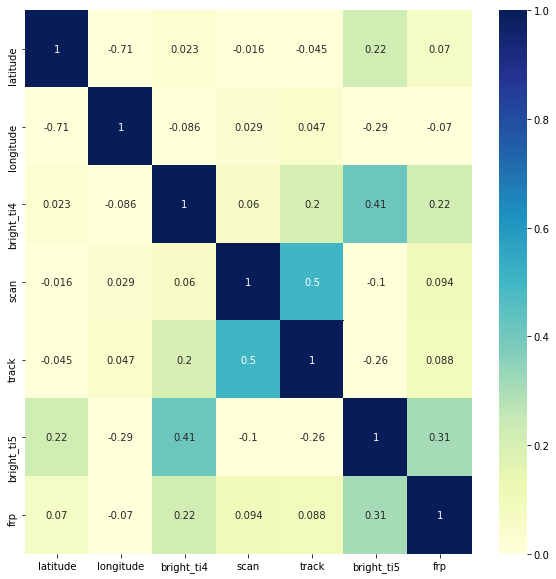

In [29]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=True,ax=ax)

BUG: CELLS DO NOT WORK ON GITHUB; INTERACTIVE VISUALS <br>
Tested working in Jupyter and VSCode <br>
Github renders images statically and does not support interactive visuals

In [30]:
# Write animation to file
fig2 = px.scatter_geo(data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='confidence',
                    animation_frame=data['period'].astype(str)) 
fig2.write_html('content/animation.html')
# TODO: Fix animation to have constant legend 

# Display animation
IFrame(src='content/animation.html', width=1080, height=720)

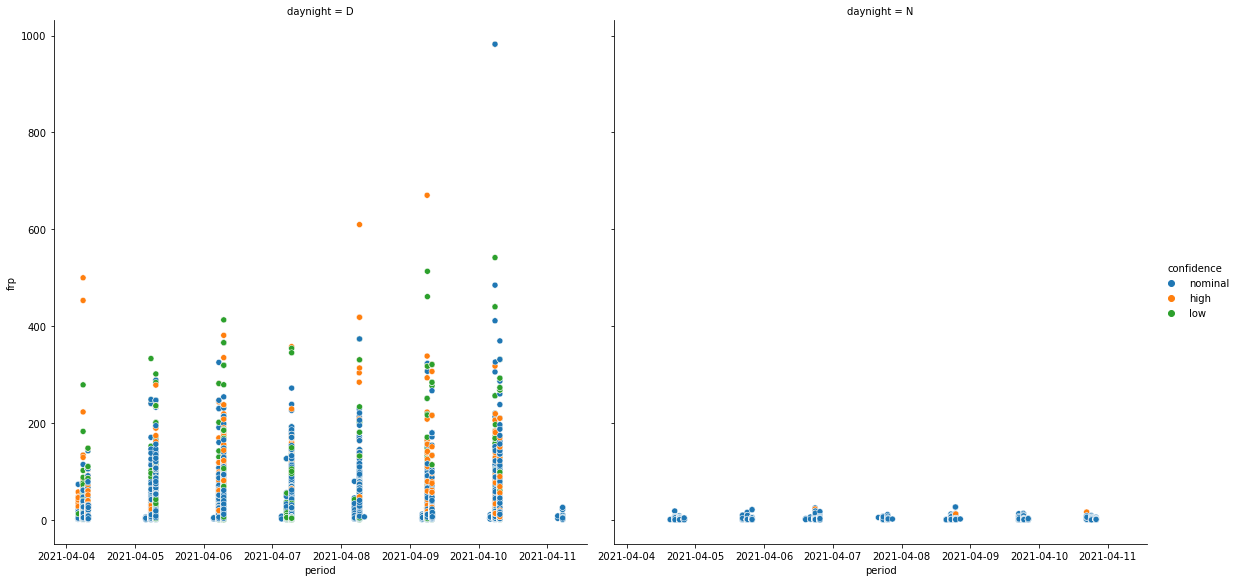

In [31]:
# FRP/confidence against time
sns.relplot(x="period", y="frp", hue="confidence", col="daynight", data=data, height=8)

We note that there seems to be some data where the gaps between data is small. Hence, this necessitates the merging of time data into hourly frames to better analyze patterns. 

In [32]:
# Processing data further to clean visualization

# Generate new DFs with times rounded down to the nearest hour
date_sorted = data
date_sorted['period'] = date_sorted['period'].dt.floor('H')
date_sorted_gb = date_sorted.groupby('acq_date') # returns a groupby object which can be called with below code

# [date_sorted.get_group(x) for x in date_sorted_gb.groups] # this displays all the dataframes

date_sorted.head(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-2.43573,133.13229,328.8,0.44,0.46,2021-04-04,04:06:00,nominal,291.3,2.0,D,2021-04-04 04:00:00
1,-2.10197,133.62312,327.6,0.41,0.45,2021-04-04,04:06:00,nominal,293.9,1.8,D,2021-04-04 04:00:00
2,-1.07484,131.30426,328.6,0.56,0.52,2021-04-04,04:06:00,nominal,290.3,2.7,D,2021-04-04 04:00:00
81,18.11591,121.01424,335.3,0.64,0.72,2021-04-04,04:12:00,nominal,293.3,5.8,D,2021-04-04 04:00:00
80,18.13276,121.08784,367.0,0.63,0.72,2021-04-04,04:12:00,high,290.6,24.8,D,2021-04-04 04:00:00
79,18.12650,121.09029,367.0,0.63,0.72,2021-04-04,04:12:00,high,292.1,24.8,D,2021-04-04 04:00:00
78,18.08769,120.98110,328.5,0.64,0.72,2021-04-04,04:12:00,nominal,293.0,3.8,D,2021-04-04 04:00:00
77,18.01829,121.15026,350.3,0.63,0.72,2021-04-04,04:12:00,nominal,294.8,12.4,D,2021-04-04 04:00:00
76,18.19885,121.94543,331.6,0.55,0.68,2021-04-04,04:12:00,nominal,293.4,8.9,D,2021-04-04 04:00:00
75,18.19996,121.95036,342.1,0.55,0.68,2021-04-04,04:12:00,nominal,292.2,8.7,D,2021-04-04 04:00:00


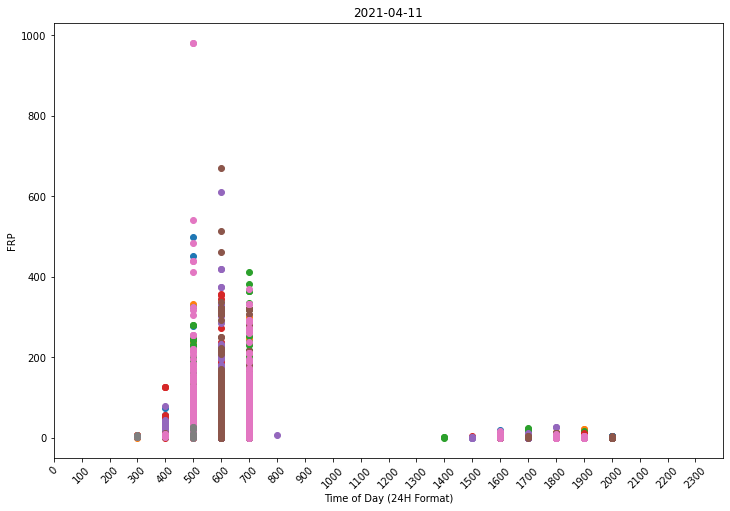

In [33]:
# Plot individual plots for every date
pd.options.mode.chained_assignment = None  # ignore warnings
# list_date = date_sorted['acq_date'].unique()

# Formatting of plot
fig3 = plt.figure(figsize=(12,8))
plt.xlabel('Time of Day (24H Format)')
plt.ylabel('FRP')
plt.xlim(0,2400)
plt.xticks(np.linspace(0,2300,num=24), rotation=45)

for x in date_sorted_gb.groups:
    plt.title(str(x.date()))

    # Data of plot
    current = date_sorted_gb.get_group(x) # iterate through groups
    current['acq_time'] = current['period'].dt.time # extract time
    current['acq_time'] = current['acq_time'].apply(str) # convert to type string
    current['acq_time'] = current['acq_time'].str.replace(':','').astype(int)/100 # convert to 24h format
    plt.scatter(current['acq_time'],current['frp'])
    plt.savefig('content/'+str(x.date())+'.png')

In [34]:
filenames = date_sorted['acq_date'].dt.date.unique().astype(str)
filenames = [(value+'.png') for value in filenames]

images = []
for filename in filenames:
    images.append(imageio.imread('content/'+filename))
imageio.mimwrite('content/dailyfrp.gif', images, format='gif', duration=1)

Image(url='content/dailyfrp.gif') 

Looking at the above visualizations, we can see that: 
- there tends to be a concentration of fire data within the same region
- most fires are detected in the day
- there seems to be a pattern in when the fires are detected within the same 7 day period

We also notice a few points where the data is seemingly in the middle of the ocean.

Consequently, this necessitates cleaning of data to remove unnecessary information. Feature selection is necessary. 

# 4 | Data Pre-Processing

## 4.1 | Cleaning Dataset

In [35]:
# Convert 'object' columns into appropriate dtype
data['confidence'].astype('category')
data['daynight'].astype('category')

0        D
1        D
2        D
81       D
80       D
        ..
32789    D
32790    D
32791    D
32777    D
32828    D
Name: daynight, Length: 32829, dtype: category
Categories (2, object): ['D', 'N']

In [36]:
# Convert time into integers
data['acq_time'] = data['acq_time'].apply(str) # convert to type string
data['acq_time'] = data['acq_time'].str.replace(':','').astype(int)
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-2.43573,133.13229,328.8,0.44,0.46,2021-04-04,40600,nominal,291.3,2.0,D,2021-04-04 04:00:00
1,-2.10197,133.62312,327.6,0.41,0.45,2021-04-04,40600,nominal,293.9,1.8,D,2021-04-04 04:00:00
2,-1.07484,131.30426,328.6,0.56,0.52,2021-04-04,40600,nominal,290.3,2.7,D,2021-04-04 04:00:00
81,18.11591,121.01424,335.3,0.64,0.72,2021-04-04,41200,nominal,293.3,5.8,D,2021-04-04 04:00:00
80,18.13276,121.08784,367.0,0.63,0.72,2021-04-04,41200,high,290.6,24.8,D,2021-04-04 04:00:00


In [37]:
# Resetting index for OHE preparation
data.set_index('period', inplace=True)
data.reset_index(inplace=True)
data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight
0,2021-04-04 04:00:00,-2.43573,133.13229,328.8,0.44,0.46,2021-04-04,40600,nominal,291.3,2.0,D
1,2021-04-04 04:00:00,-2.10197,133.62312,327.6,0.41,0.45,2021-04-04,40600,nominal,293.9,1.8,D
2,2021-04-04 04:00:00,-1.07484,131.30426,328.6,0.56,0.52,2021-04-04,40600,nominal,290.3,2.7,D
3,2021-04-04 04:00:00,18.11591,121.01424,335.3,0.64,0.72,2021-04-04,41200,nominal,293.3,5.8,D
4,2021-04-04 04:00:00,18.13276,121.08784,367.0,0.63,0.72,2021-04-04,41200,high,290.6,24.8,D


In [38]:
# Converting latitude and longitude values to location values

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']), crs={'init': 'epsg:4326'})
result = gpd.sjoin(gdf, world, how='left')
result.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
0,2021-04-04 04:00:00,-2.43573,133.13229,328.8,0.44,0.46,2021-04-04,40600,nominal,291.3,2.0,D,POINT (133.13229 -2.43573),NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-04 04:00:00,-2.10197,133.62312,327.6,0.41,0.45,2021-04-04,40600,nominal,293.9,1.8,D,POINT (133.62312 -2.10197),8.0,260580739.0,Asia,Indonesia,IDN,3028000.0
2,2021-04-04 04:00:00,-1.07484,131.30426,328.6,0.56,0.52,2021-04-04,40600,nominal,290.3,2.7,D,POINT (131.30426 -1.07484),8.0,260580739.0,Asia,Indonesia,IDN,3028000.0
3,2021-04-04 04:00:00,18.11591,121.01424,335.3,0.64,0.72,2021-04-04,41200,nominal,293.3,5.8,D,POINT (121.01424 18.11591),147.0,104256076.0,Asia,Philippines,PHL,801900.0
4,2021-04-04 04:00:00,18.13276,121.08784,367.0,0.63,0.72,2021-04-04,41200,high,290.6,24.8,D,POINT (121.08784 18.13276),147.0,104256076.0,Asia,Philippines,PHL,801900.0


In [39]:
# Remove irrelevant geometric information and NaN values
result.drop(['geometry','index_right','iso_a3','gdp_md_est'],axis=1,inplace=True)
result.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,pop_est,continent,name
0,2021-04-04 04:00:00,-2.43573,133.13229,328.8,0.44,0.46,2021-04-04,40600,nominal,291.3,2.0,D,NaN,NaN,NaN
1,2021-04-04 04:00:00,-2.10197,133.62312,327.6,0.41,0.45,2021-04-04,40600,nominal,293.9,1.8,D,260580739.0,Asia,Indonesia
2,2021-04-04 04:00:00,-1.07484,131.30426,328.6,0.56,0.52,2021-04-04,40600,nominal,290.3,2.7,D,260580739.0,Asia,Indonesia
3,2021-04-04 04:00:00,18.11591,121.01424,335.3,0.64,0.72,2021-04-04,41200,nominal,293.3,5.8,D,104256076.0,Asia,Philippines
4,2021-04-04 04:00:00,18.13276,121.08784,367.0,0.63,0.72,2021-04-04,41200,high,290.6,24.8,D,104256076.0,Asia,Philippines


In [40]:
# Check for null values
result.isnull().sum()

period          0
latitude        0
longitude       0
bright_ti4      0
scan            0
track           0
acq_date        0
acq_time        0
confidence      0
bright_ti5      0
frp             0
daynight        0
pop_est       826
continent     826
name          826
dtype: int64

In [41]:
# Above means there are null values present. 
# Solution: remove rows
result.dropna(inplace=True)
result.reset_index(inplace=True,drop=True) # reset index of dataframe to account for missing values
result.isnull().sum()

period        0
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
confidence    0
bright_ti5    0
frp           0
daynight      0
pop_est       0
continent     0
name          0
dtype: int64

In [42]:
# Visualize clean dataset
result.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,pop_est,continent,name
0,2021-04-04 04:00:00,-2.10197,133.62312,327.6,0.41,0.45,2021-04-04,40600,nominal,293.9,1.8,D,260580739.0,Asia,Indonesia
1,2021-04-04 04:00:00,-1.07484,131.30426,328.6,0.56,0.52,2021-04-04,40600,nominal,290.3,2.7,D,260580739.0,Asia,Indonesia
2,2021-04-04 04:00:00,18.11591,121.01424,335.3,0.64,0.72,2021-04-04,41200,nominal,293.3,5.8,D,104256076.0,Asia,Philippines
3,2021-04-04 04:00:00,18.13276,121.08784,367.0,0.63,0.72,2021-04-04,41200,high,290.6,24.8,D,104256076.0,Asia,Philippines
4,2021-04-04 04:00:00,18.12650,121.09029,367.0,0.63,0.72,2021-04-04,41200,high,292.1,24.8,D,104256076.0,Asia,Philippines


## 4.2 | One Hot Encoding

In [43]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

ohe_confidence = pd.DataFrame(enc.fit_transform(result[['confidence']]).toarray())
ohe_confidence.columns = enc.get_feature_names(['confidence'])
#ohe_confidence.head()

ohe_daynight = pd.DataFrame(enc.fit_transform(result[['daynight']]).toarray())
ohe_daynight.columns = enc.get_feature_names(['daynight'])
# ohe_daynight.head()

ohe_continent = pd.DataFrame(enc.fit_transform(result[['continent']]).toarray())
ohe_continent.columns = enc.get_feature_names(['continent'])
# ohe_continent.head()

ohe_name = pd.DataFrame(enc.fit_transform(result[['name']]).toarray())
ohe_name.columns = enc.get_feature_names(['name'])
# ohe_name.head()

In [44]:
# Concatenate OHE variables with dataframe
new_data = pd.concat([result,ohe_confidence,ohe_daynight,ohe_continent,ohe_name], axis=1)
new_data.drop(['confidence', 'daynight','continent','name'], axis=1, inplace=True)
new_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,bright_ti5,frp,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,2021-04-04 04:00:00,-2.10197,133.62312,327.6,0.41,0.45,2021-04-04,40600,293.9,1.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-04-04 04:00:00,-1.07484,131.30426,328.6,0.56,0.52,2021-04-04,40600,290.3,2.7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-04-04 04:00:00,18.11591,121.01424,335.3,0.64,0.72,2021-04-04,41200,293.3,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2021-04-04 04:00:00,18.13276,121.08784,367.0,0.63,0.72,2021-04-04,41200,290.6,24.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2021-04-04 04:00:00,18.12650,121.09029,367.0,0.63,0.72,2021-04-04,41200,292.1,24.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 4.3 | Splitting & Standardization

In [45]:
# Check datatypes of new dataframe
new_data.dtypes

period                   datetime64[ns]
latitude                        float64
longitude                       float64
bright_ti4                      float64
scan                            float64
track                           float64
acq_date                 datetime64[ns]
acq_time                          int32
bright_ti5                      float64
frp                             float64
pop_est                         float64
confidence_high                 float64
confidence_low                  float64
confidence_nominal              float64
daynight_D                      float64
daynight_N                      float64
continent_Asia                  float64
continent_Oceania               float64
name_Bangladesh                 float64
name_Bhutan                     float64
name_Brunei                     float64
name_Cambodia                   float64
name_China                      float64
name_India                      float64
name_Indonesia                  float64


In [46]:
# Standardization can only be done on numeric data - hence, columns not of int or float type should be removed.
new_data.drop(['period','acq_date','latitude','longitude'],axis=1,inplace=True)
new_data.dtypes

bright_ti4               float64
scan                     float64
track                    float64
acq_time                   int32
bright_ti5               float64
frp                      float64
pop_est                  float64
confidence_high          float64
confidence_low           float64
confidence_nominal       float64
daynight_D               float64
daynight_N               float64
continent_Asia           float64
continent_Oceania        float64
name_Bangladesh          float64
name_Bhutan              float64
name_Brunei              float64
name_Cambodia            float64
name_China               float64
name_India               float64
name_Indonesia           float64
name_Laos                float64
name_Malaysia            float64
name_Myanmar             float64
name_Nepal               float64
name_Papua New Guinea    float64
name_Philippines         float64
name_Taiwan              float64
name_Thailand            float64
name_Vietnam             float64
dtype: obj

In [47]:
# Generate labels for modified dataset
mod_var = [[],[],[],[],[],[]]
var = ['bright_ti4','scan','track','bright_ti5','pop_est']
quantile = ['_20p','_40p','_60p','_80p','_100p']
quartile = ['_25p','_50p','_75p','_100p']

for x in range(len(var)):
    mod_var[x] = [var[x] + value for value in quantile]
    print (mod_var[x])
mod_var[-1]=['acq_time'+value for value in quartile]
print (mod_var[-1])

['bright_ti4_20p', 'bright_ti4_40p', 'bright_ti4_60p', 'bright_ti4_80p', 'bright_ti4_100p']
['scan_20p', 'scan_40p', 'scan_60p', 'scan_80p', 'scan_100p']
['track_20p', 'track_40p', 'track_60p', 'track_80p', 'track_100p']
['bright_ti5_20p', 'bright_ti5_40p', 'bright_ti5_60p', 'bright_ti5_80p', 'bright_ti5_100p']
['pop_est_20p', 'pop_est_40p', 'pop_est_60p', 'pop_est_80p', 'pop_est_100p']
['acq_time_25p', 'acq_time_50p', 'acq_time_75p', 'acq_time_100p']


In [48]:
# Convert input to categorical input
data_bright_ti4,data_bright_ti4_intervals=pd.qcut(new_data['bright_ti4'], 5, retbins=True,
                        labels=mod_var[0])
data_scan,data_scan_intervals=pd.qcut(new_data['scan'], 5, retbins=True,
                        labels=mod_var[1])
data_track,data_track_intervals=pd.qcut(new_data['track'], 5, retbins=True,
                        labels=mod_var[2])
data_bright_ti5,data_bright_ti5_intervals=pd.qcut(new_data['bright_ti5'], 5, retbins=True,
                        labels=mod_var[3])
data_pop_est,data_pop_est_intervals=pd.qcut(new_data['pop_est'], 5, retbins=True,
                        labels=mod_var[4])
data_acq_time,data_acq_time_intervals=pd.qcut(new_data['acq_time'], 4, retbins=True,
                        labels=mod_var[5])

In [49]:
#Concatenate all to a single DF
cont_var = pd.concat([data_bright_ti4,data_scan,data_track,data_bright_ti5,data_pop_est,data_acq_time], axis=1)

In [50]:
# One-Hot Encoding
ohe_bright_ti4 = pd.DataFrame(enc.fit_transform(cont_var[['bright_ti4']]).toarray())
ohe_bright_ti4.columns = enc.get_feature_names(['bright_ti4'])

ohe_scan = pd.DataFrame(enc.fit_transform(cont_var[['scan']]).toarray())
ohe_scan.columns = enc.get_feature_names(['scan'])

ohe_track = pd.DataFrame(enc.fit_transform(cont_var[['track']]).toarray())
ohe_track.columns = enc.get_feature_names(['track'])

ohe_bright_ti5 = pd.DataFrame(enc.fit_transform(cont_var[['bright_ti5']]).toarray())
ohe_bright_ti5.columns = enc.get_feature_names(['bright_ti5'])

ohe_pop_est = pd.DataFrame(enc.fit_transform(cont_var[['pop_est']]).toarray())
ohe_pop_est.columns = enc.get_feature_names(['pop_est'])

ohe_acq_time = pd.DataFrame(enc.fit_transform(cont_var[['acq_time']]).toarray())
ohe_acq_time.columns = enc.get_feature_names(['acq_time'])


In [51]:
new_data.drop(['bright_ti4','scan','track','acq_time','bright_ti5','pop_est'],axis=1,inplace=True)
new_data = pd.concat([ohe_bright_ti4,ohe_scan,ohe_track,ohe_bright_ti5,ohe_pop_est,ohe_acq_time,new_data],axis=1)

In [52]:
new_data.head()

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
# # Pre-Standardization Heatmap
# plt.figure(3)
# fig, ax = plt.subplots(figsize=(25,25)) 
# sns.heatmap(new_data.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=True,ax=ax)

Standardization should only be done on numeric variables. However, to prevent the problem of data leakage, where information from outside the training dataset is used to create the training model, the datasets will be split into the training, test and validation datasets before the numeric data will be standardized.

src: [Data Leakage](https://machinelearningmastery.com/data-leakage-machine-learning/)

In [54]:
# Define input, output variables
X = new_data.drop(['frp'], axis=1)
y = pd.DataFrame(new_data['frp'])
X.head()

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
# Split dataset into train, test, val data with a 60-20-20 split
from sklearn.model_selection import train_test_split

# include random seed to fix randomization
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0) # split out train data 
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=0) # split test, val data

# Check shape
print ("Shape of Train Dataset (X,y):", X_train.shape, ",", y_train.shape)
print ("Shape of Test Dataset (X,y):", X_test.shape, ",", y_test.shape)
print ("Shape of Val Dataset (X,y):", X_val.shape, ",", y_val.shape)

Shape of Train Dataset (X,y): (19201, 52) , (19201, 1)
Shape of Test Dataset (X,y): (6401, 52) , (6401, 1)
Shape of Val Dataset (X,y): (6401, 52) , (6401, 1)


In [56]:
# # Z-scoring Standardization

# from sklearn.preprocessing import StandardScaler, Normalizer
# def standardize(df):
#     # create a scaler object
#     std_scaler = StandardScaler()

#     # fit and transform the data
#     return pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

# numX_train = X_train[['bright_ti4','scan','track','acq_time','bright_ti5','pop_est']]
# numX_train  = standardize(numX_train)
# stdX_train = X_train.drop(['bright_ti4','scan','track','acq_time','bright_ti5','pop_est'], axis=1)
# std_train = pd.concat([y_train,numX_train,stdX_train], axis=1)
# plt.figure(4)
# fig, ax = plt.subplots(figsize=(25,25)) 
# sns.heatmap(std_train.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=True,ax=ax)

In [93]:
##convert to numpy to use with randomforest
X_trainn = X_train.values
y_trainn = y_train.values.reshape(-1,)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(X_trainn, y_trainn);

# get importance
importance = rf.feature_importances_
# summarize feature importance
important_features_dict = {}
for i,v in enumerate(importance):
    important_features_dict[X_train.columns[i]] = v

sorted_values = sorted(important_features_dict.values(),reverse=True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in important_features_dict.keys():
        if important_features_dict[k] == i:
            sorted_dict[k] = important_features_dict[k]
            break

toplist = []
for i in sorted_dict:
    # print(i,sorted_dict[i])
    toplist.append(i)

first3vals = toplist[:3]
print(first3vals)

['bright_ti4_bright_ti4_100p', 'bright_ti5_bright_ti5_100p', 'confidence_low']


From the heatmap, we can determine that the top 3 features that correlate with the Fire Radiative Power (FRP) is the Brightness Value from the I4 Channel (bright_ti4) and the I5 Channel (bright_ti5), along with the high confidence level of the satellite (confidence_high).

# Models - Supervised Learning
In this section, we shall be using our dataset o train two different models to attempt to predict a value of FRP (Fire Radiative Power). The two relevant features that we are using to predict FRP values would be bright_ti4 and bright_ti5. 

In [94]:
#cleaning
#we can set this data afterwards the features are selected, for now I'll just use ti columns
data_xs = new_data[[first3vals[0], first3vals[1],first3vals[2]]]
data_y = new_data[['frp']]

print(data_xs[:5], data_xs.shape)
print(data_y[:5], data_y.shape)

   bright_ti4_bright_ti4_100p  bright_ti5_bright_ti5_100p  confidence_low
0                         0.0                         0.0             0.0
1                         0.0                         0.0             0.0
2                         0.0                         0.0             0.0
3                         1.0                         0.0             0.0
4                         1.0                         0.0             0.0 (32003, 3)
    frp
0   1.8
1   2.7
2   5.8
3  24.8
4  24.8 (32003, 1)


In [ ]:
#visualization
def scatterplot_XY(x, y):
    plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
    #plt.xlabel(x.keys())
    plt.ylabel('frp') 
    plt.show()
    plt.clf()


for column in data_xs:
    x= data_xs[column]
    y = data_y
    scatterplot_XY(x, y)

Train-Validation-Test Split

In [ ]:
# data for the models here
data_xs = data_xs
data_y = data_y

#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_xs, data_y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


In [ ]:
#train-validation Cross Validation with folds
def crossvald(data_xs, data_y):
  ### n_folds = 4

  X_b1, X_b2, y_b1, y_b2 = train_test_split(data_xs, data_y, test_size=0.5, random_state=0)
  X_1, X_2, y_1, y_2 = train_test_split(X_b1, y_b1, test_size=0.5, random_state=0)
  X_3, X_4, y_3, y_4 = train_test_split(X_b2, y_b2, test_size=0.5, random_state=0)

  cross_sets ={1:{'train_X': np.concatenate((X_2,X_3,X_4)),
                  'train_y': np.concatenate((y_2,y_3,y_4)),
                  'val_X': X_1,
                  'val_y': y_1,
                    },
               2:{'train_X': np.concatenate((X_1,X_3,X_4)),
                  'train_y': np.concatenate((y_1,y_3,y_4)),
                  'val_X': X_2,
                  'val_y': y_2,
                    },
               3:{'train_X': np.concatenate((X_2,X_1,X_4)),
                  'train_y': np.concatenate((y_2,y_1,y_4)),
                  'val_X': X_3,
                  'val_y': y_3,
                    },
               4:{'train_X': np.concatenate((X_2,X_3,X_1)),
                  'train_y': np.concatenate((y_2,y_3,y_1)),
                  'val_X': X_4,
                  'val_y': y_4,
                    },
               }

  return cross_sets

test = crossvald(X_train, y_train)

In [ ]:
print(test[1]['train_X'].shape)
print(test[1]['val_X'].shape)

## 4.1 | Linear Regression Model
Firstly, we shall be attempting to use a linear regression model to predict the continuous FRP values

In [ ]:
from sklearn.linear_model import LinearRegression
 
def linear_reg(X,y):
  reg = LinearRegression().fit(X, y)

  #R^2 value, which is between -1 and 1
  print("Model Loss of R^2:", reg.score(X, y))

  print("Coeffcients [x1,x2] : ", reg.coef_)
  print("Intercept:", reg.intercept_)
  return reg

reg_train = linear_reg(X_train, y_train)

In [ ]:
y_pred = reg_train.predict(X_test)

print(y_pred[:5], type(y_pred), y_pred.shape)

df = pd.DataFrame(data=np.concatenate((y_test,y_pred),axis=1), columns=["Actual","Predicted"])

print (df[:5])
  
def loss_mse(y_pred, y_test):
  n = len(y_pred)
  total = (y_pred-y_test).T.dot(y_pred-y_test)
  loss = 1/n* total
  return loss

loss = loss_mse(y_pred, y_test)
print("Loss Test Set", loss)

y_pred_train = reg_train.predict(X_train)
loss = loss_mse(y_pred_train, y_train)
print("Loss Train set:", loss)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
#attempt at visualization
def scatterplot_wmodel(x,y,f_pred):
  plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
  #plt.xlabel(x.keys())
  plt.ylabel('frp') 

  x_pred = np.linspace(min(x),max(x),100)
  y_pred = f_pred(x_pred)
  plt.plot(x_pred, y_pred)
  plt.show()
  plt.clf()

i = 0
for column in data_xs:
  x= data_xs[column]
  y = data_y  
  x_pred = np.linspace(min(x),max(x),100)
  y_pred = reg_train.coef_[0][i]*x_pred + reg_train.intercept_
  plt.plot(x_pred,y_pred) 
  
  plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
  plt.show() 
  i += 1
  plt.clf()



## Random Forest/Decision Tree
Attempt to use random forest/Decision tree to model the variables

implemented using this: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [ ]:
print(type(y_train))
print(type(X_train))

##convert to numpy to use with randomforest
X_trainn = X_train.values
y_trainn = y_train.values.reshape(-1,)

print(type(y_trainn), y_trainn.shape)
print(type(X_trainn), X_trainn.shape)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
# Train the model on training data
rf.fit(X_trainn, y_trainn);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test.values)
# Calculate the absolute errors
errors = abs(predictions - y_test.values.reshape(-1,))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


df = pd.DataFrame(data=np.concatenate((y_test,predictions.reshape(-1,1), errors.reshape(-1,1)),axis=1), columns=["Actual","Predicted", "Absolute Error"])

print (df[:5])

In [ ]:
# Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
mape = 100 * (errors / ((abs(y_test.values.reshape(-1,))+abs(predictions))/2))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

# Train the Decision Tree Classifier model
# dectree.fit(X_train, y_train)

# Export the Decision Tree as a dot object
treedot = export_graphviz(rf.estimators_[0],                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True,                    # postscript
                          max_depth = 5)                    

# Render using graphviz
graphviz.Source(treedot)

In [ ]:
# feature_list = X_train.columns

# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)


In [ ]:
# #run with caution Already generated in folder
# # Use dot file to create a graph
# # oh no this takes forever to excute - estimated time = 4mins
# (graph, ) = pydot.graph_from_dot_file('tree.dot')
# # Write graph to a png file - estimated time >15mins
# graph.write_png('tree.png')

##Neural Network Implementation
Try a neural network I guess here

In [ ]:
#turn frp into categorical data? 
#I honestly have no clue how to do it
#cos neural network is mostly for y is categorical data I feel


## Polynomial Model with Cross-Fold Validation
Cross-Fold Validation is used to optimize for the d variable

# 6 | Models - Unsupervised Learning
K-means clustering to identify hotspots from one day of datapoints

In [ ]:
data[:5]

In [ ]:
#cleaning the data, the relevant data is just lat, long and frp, confidence
#need to restructure the data such that it separates out the dates

data_c = data[['latitude', 'longitude', 'frp', 'confidence']].groupby(data['acq_date'])

data_w = list(data_c)[0][1]

In [ ]:
fig1 = px.scatter_geo(data_w, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',)
fig1.show()

To conduct clustering, we need to find a suitable algorithm which is fast enough to deal with the number of data points we have.
</p>

In [ ]:
print("Number of data points we have=", data_w.shape[0])

In [ ]:
from scipy.cluster.vq import vq, kmeans, whiten
# from numpy import array
# import matplotlib.pyplot as plt
features  = array([[ 1.9,2.3],
                   [ 1.5,2.5],
                   [ 0.8,0.6],
                   [ 0.4,1.8],
                   [ 0.1,0.1],
                   [ 0.2,1.8],
                   [ 2.0,0.5],
                   [ 0.3,1.5],
                   [ 1.0,1.0]])
whitened = whiten(features)
book = np.array((whitened[0],whitened[2]))
kmeans(whitened,book)

from numpy import random
random.seed((1000,2000))
codes = 3
kmeans(whitened,codes)

# Create 50 datapoints in two clusters a and b
pts = 50
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10],
                                  [[10, 2], [2, 1]],
                                  size=pts)
features = np.concatenate((a, b))
# Whiten data
whitened = whiten(features)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)
# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

# 7 | I'm gonna try a different dataset because this dataset is so limited :(


# Trash



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(data_xs, data_y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


##svm doesnt work because its meant for classification
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

## TEST ZONE

In [ ]:
# Split dataset into train, test, val data with a 60-20-20 split
from sklearn.model_selection import train_test_split

# include random seed to fix randomization
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0) # split out train data 
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=0) # split test, val data

# Check shape
print ("Shape of Train Dataset (X,y):", X_train.shape, ",", y_train.shape)
print ("Shape of Test Dataset (X,y):", X_test.shape, ",", y_test.shape)
print ("Shape of Val Dataset (X,y):", X_val.shape, ",", y_val.shape)

In [ ]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) 
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w)) 
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = -1/n* ( y.T.dot(np.log(y_pred)) + (1-y).T.dot(np.log(1-y_pred)) ) 
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 1/n* X.T.dot(y_pred-y) 
    return grad


# gradient descent function definition
def grad_desc(X, y , w_init, tau, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function   
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss  
        w = w - tau* grad_f # update rule of gradient descent  
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        
    return w, L_iters

In [ ]:
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(data[:,0:2], data[:,2]) # learn the model parameters

# compute loss value
w_sklearn = np.zeros([3,1])
w_sklearn[0,0] = logreg_sklearn.intercept_
w_sklearn[1:3,0] = logreg_sklearn.coef_
print(w_sklearn)
loss_sklearn = loss_logreg(f_pred(X,w_sklearn),data[:,2][:,None])
print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 

In [ ]:
print (X_train.shape[0])
X_train=X_train.to_numpy()

In [ ]:
a = X_train.shape[0]
b = X_train.shape[1]
X = np.ones([a,b+1])
X[:,1:b+1] = X_train[:,0:b]
print(X.shape)
y = y_train.to_numpy().ravel()
print(y.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(X, y) # learn the model parameters

# # compute loss value
# w_sklearn = np.zeros([3,1])
# w_sklearn[0,0] = logreg_sklearn.intercept_
# w_sklearn[1:3,0] = logreg_sklearn.coef_
# print(w_sklearn)
# loss_sklearn = loss_logreg(f_pred(X,w_sklearn),data[:,2][:,None])
# print('loss sklearn=',loss_sklearn)
# print('loss gradient descent=',L_iters[-1]) 